In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/threads-data-set/threads_reviews.csv


In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import nltk 
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/threads-data-set/threads_reviews.csv',sep=',')
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [4]:
df.shape

(32910, 4)

In [5]:
print(df['source'].value_counts())
print()
print(df['rating'].value_counts())

Google Play    30270
App Store       2640
Name: source, dtype: int64

5    15559
1     9726
4     3244
3     2585
2     1796
Name: rating, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

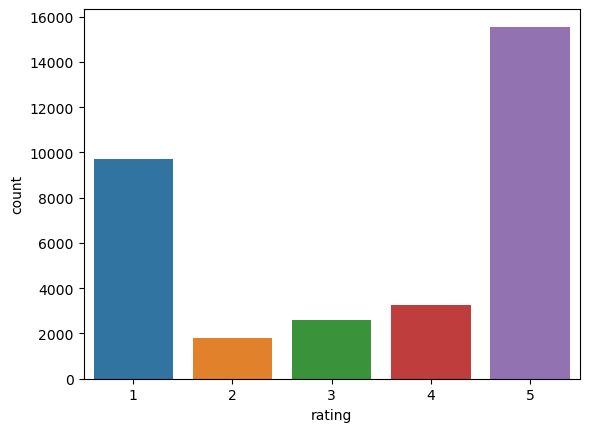

In [6]:
#visualize ratings
sns.countplot(x='rating',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

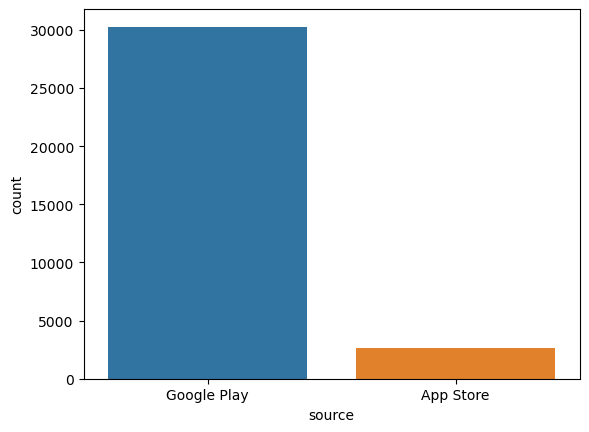

In [7]:
#visualize source
sns.countplot(x='source',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

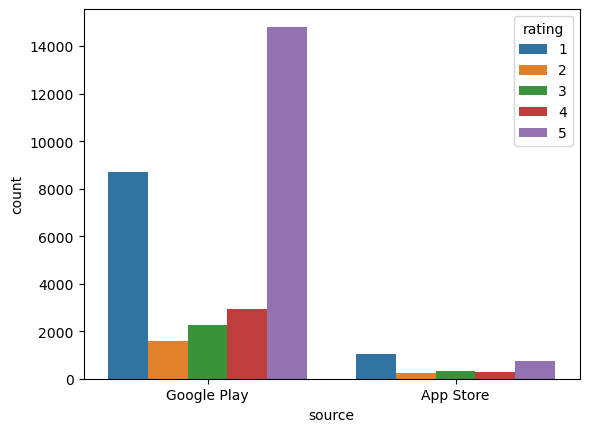

In [8]:
#visualize ratings w.r.t source
sns.countplot(x='source',data=df,hue='rating')
plt.show

In [9]:
## pre process the text
def clean_the_code(text):
    text=text.lower()
    text=re.sub('[^a-z0-9]',' ',text)
    text=word_tokenize(text)
    
    stop_words=set(stopwords.words('english'))
    text=[word for word in text if not word  in stop_words]
    stemmer=SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text]
    text=[word for word in text if len(word)>1]
    return ' '.join(text)
    
print(clean_the_code('design of thrad app is elagant..!!!')  )  

design thrad app elag


In [10]:
df['transformed_text']=df['review_description'].apply(clean_the_code)

In [11]:
df.head()

,source,review_description,rating,review_date,transformed_text
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,meh greatest experi chromebook seem custom pho...
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,pretti good first launch easi use self explana...
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,brand new app well optim howev miss quit featu...
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,great app lot potenti howev lot need fix examp...
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,app good need lot function exampl search topic...


In [12]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

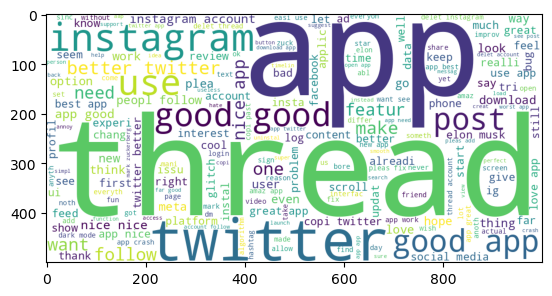

In [13]:
#visualize most used words
text_corpus=' '.join(df['transformed_text'].values)
wc=WordCloud(width=1000, height=500, background_color='white').generate(text_corpus)
plt.imshow(wc)
plt.show

In [14]:
from  textblob import TextBlob

In [15]:
#find sentiment of each review
def find_setiment(text):
    polarity=TextBlob(text).sentiment.polarity
    if polarity>0:
        return 'positive'
    if polarity==0:
        return 'neutral' 
    if polarity<0:
        return 'negative'
    
print(find_setiment('Thread is same as twitter')) 
print(find_setiment('Thread is better than twitter')) 
print(find_setiment('thread is worst')) 

neutral
positive
negative


In [16]:
df['sentiment']=df['transformed_text'].apply(find_setiment)

In [17]:
df[['transformed_text','sentiment']]

,transformed_text,sentiment
0,meh greatest experi chromebook seem custom pho...,positive
1,pretti good first launch easi use self explana...,positive
2,brand new app well optim howev miss quit featu...,positive
3,great app lot potenti howev lot need fix examp...,positive
4,app good need lot function exampl search topic...,positive
...,...,...
32905,kill dog mark zuckerburg strangl dog gone,neutral
32906,add search hashtag like twitter,neutral
32907,bad twister,negative
32908,yet anoth trash meta,neutral


<function matplotlib.pyplot.show(close=None, block=None)>

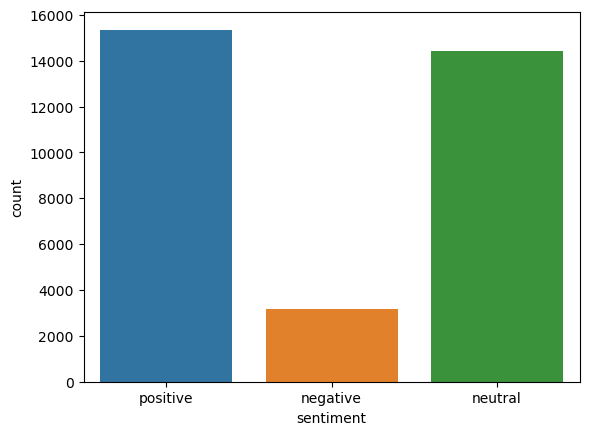

In [18]:
sns.countplot(x='sentiment',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

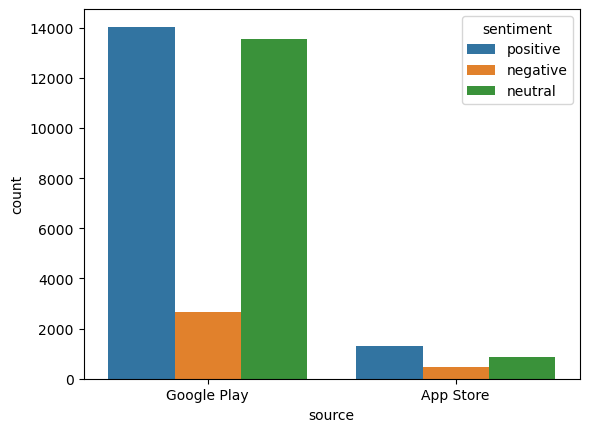

In [19]:
sns.countplot(x='source',data=df,hue='sentiment')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

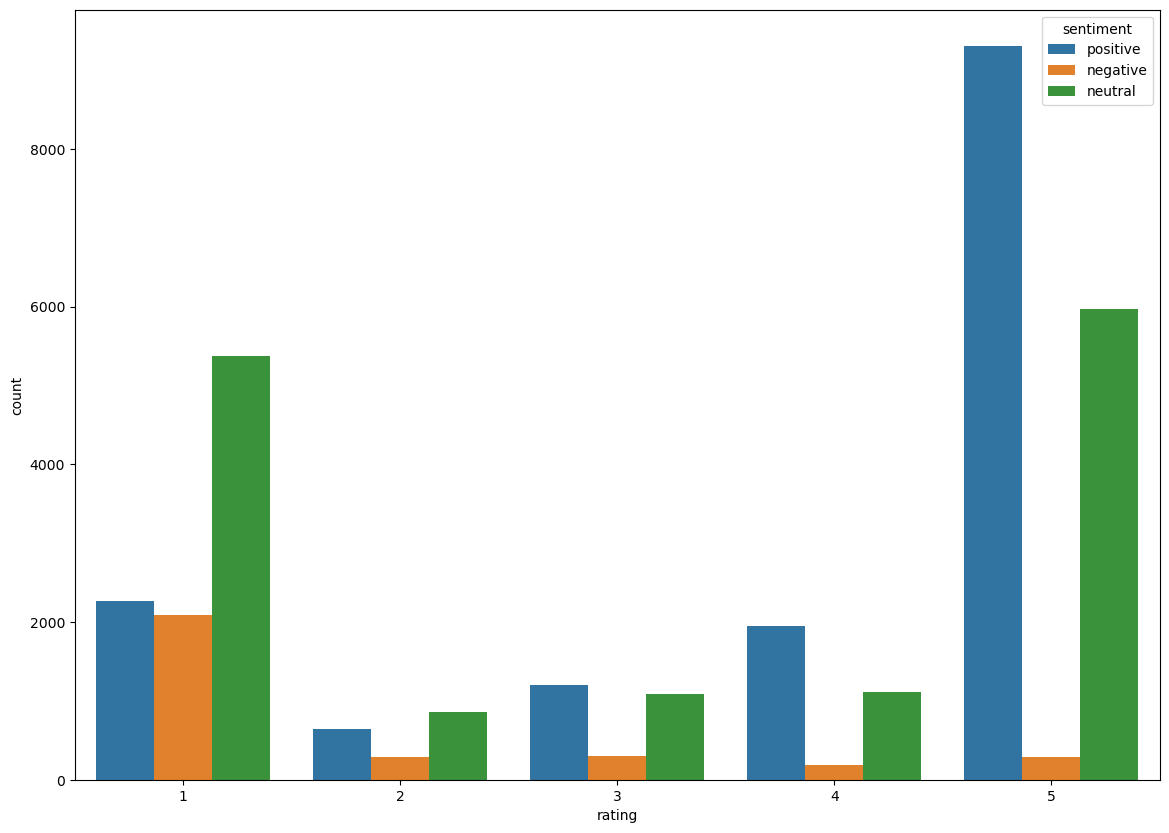

In [20]:
#visualize ratings w.r.t sentiment 
plt.figure(figsize=(14,10))
sns.countplot(x='rating',data=df,hue='sentiment')
plt.show

**even 5 star ratings also have negative & neutral reviews**

<function matplotlib.pyplot.show(close=None, block=None)>

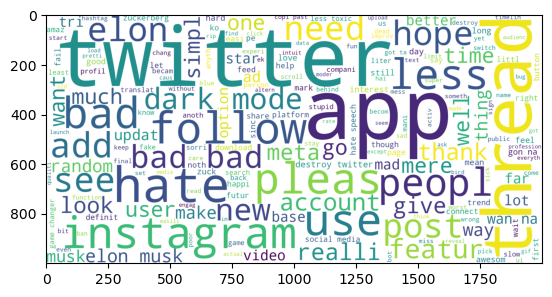

In [21]:
#find words used for 5 star rating with negative sentiment 
Wc=df[(df['rating']==5 )& (df['sentiment']=='negative')]['transformed_text'].values
plt.imshow(WordCloud(width = 2000, height = 1000,background_color='white').generate(' '.join(Wc)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

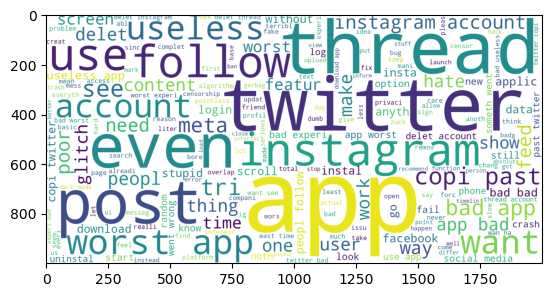

In [22]:
#find words used for 1 star rating with negative sentiment 
Wc=df[(df['rating']==1 )& (df['sentiment']=='negative')]['transformed_text'].values
plt.imshow(WordCloud(width = 2000, height = 1000,background_color='white').generate(' '.join(Wc)))
plt.show